# 학교 안전사고 현황 분석

- 코드 작성자 : 최은혜
- 코드 작성일 : 2024-07-06

## 0. 라이브러리 및 데이터 임포트

In [60]:
import pandas as pd
import numpy as np
import polars as pl
from datetime import datetime
import pyarrow
import plotly.express as px

In [24]:
# df_2019 = pd.read_excel('../../data/★2019~2023 학교안전사고 데이터_수정.xlsx',sheet_name='2019')
# df_2020 = pd.read_excel('../../data/★2019~2023 학교안전사고 데이터_수정.xlsx',sheet_name='2020')
# df_2021 = pd.read_excel('../../data/★2019~2023 학교안전사고 데이터_수정.xlsx',sheet_name='2021')
# df_2022 = pd.read_excel('../../data/★2019~2023 학교안전사고 데이터_수정.xlsx',sheet_name='2022')
# df_2023 = pd.read_excel('../../data/★2019~2023 학교안전사고 데이터_수정.xlsx',sheet_name='2023').rename(columns={'매개물':'사고매개물'})

In [29]:
# df = pd.concat([df_2019,df_2020,df_2021,df_2022,df_2023])
# df.to_csv('학교안전사고데이터_통합.csv',index=False,encoding='utf-8-sig')

In [12]:

# df = df.to_pandas()

# df['사고발생일'] = pd.to_datetime(df['사고발생일'])

# df_before_2018 = df.query("사고발생일 < '2019-01-01'")
# df_2019 = df[df['사고발생일'].between('2019-01-01', '2019-12-31')]
# df_2020 = df[df['사고발생일'].between('2020-01-01', '2020-12-31')]
# df_2021 = df[df['사고발생일'].between('2021-01-01', '2021-12-31')]
# df_2022 = df[df['사고발생일'].between('2022-01-01', '2022-12-31')]
# df_2023 = df[df['사고발생일'].between('2023-01-01', '2023-12-31')]

In [80]:
df.to_csv('학교안전사고데이터_통합.csv',index=False,encoding='utf-8-sig')

In [79]:
df = df[df['사고발생일'].between('2019-01-01', '2023-12-31')]

In [41]:
df = pd.read_csv('../../data/학교안전사고데이터통합/학교안전사고데이터_통합.csv')

df['사고발생일'] = pd.to_datetime(df['사고발생일'])
df['연도'] = df['사고발생일'].map(lambda x : x.year)

df_2019 = df[df['사고발생일'].between('2019-01-01', '2019-12-31')]
df_2020 = df[df['사고발생일'].between('2020-01-01', '2020-12-31')]
df_2021 = df[df['사고발생일'].between('2021-01-01', '2021-12-31')]
df_2022 = df[df['사고발생일'].between('2022-01-01', '2022-12-31')]
df_2023 = df[df['사고발생일'].between('2023-01-01', '2023-12-31')]

In [51]:
# df = pl.read_csv('../../data/학교안전사고데이터통합/학교안전사고데이터_통합.csv')
# df = df.with_columns(
#     pl.col("사고발생일").str.to_datetime("%Y-%m-%d")
# )
# df.filter(
#     (pl.col("사고발생일") >= datetime(2021, 1, 1)) &
#     (pl.col("사고발생일") <= datetime(2021, 12, 31))
#     )

구분,학교급,지역,교육청,설립유형,사고자구분,사고자성별,사고자학년,사고발생일,사고발생요일,사고발생시각,사고시간,사고장소,사고부위,사고형태,사고당시활동,사고매개물,매개물
str,str,str,str,str,str,str,str,datetime[μs],str,str,str,str,str,str,str,str,str
"""C0000048""","""유치원""","""충남""","""천안교육지원청""","""사립""","""일반학생""","""여""","""유아""",2021-01-04 00:00:00,"""월""","""13:20""","""수업시간""","""교실""","""기타""","""낙상-미끄러짐""","""보행/주행""","""자연(사람/동물/식물 등)…",null
"""C0000076""","""유치원""","""부산""","""북부교육지원청""","""사립""","""일반학생""","""남""","""유아""",2021-01-04 00:00:00,"""월""","""10:40""","""수업시간""","""교실""","""치아(구강)""","""낙상-떨어짐""","""장난/놀이""","""건물(문/창문/바닥/벽 등…",null
"""C0000111""","""고등학교""","""경남""","""경상남도교육청""","""공립""","""일반학생""","""남""","""2학년""",2021-01-04 00:00:00,"""월""","""12:00""","""체육수업""","""운동장""","""복합부위""","""물리적힘 노출""","""구기운동""","""운동(놀이)용 장비/기구(…",null
"""C0000112""","""고등학교""","""경남""","""경상남도교육청""","""공립""","""일반학생""","""남""","""2학년""",2021-01-04 00:00:00,"""월""","""12:00""","""수업시간""","""운동장""","""발""","""물리적힘 노출""","""실험실습""","""운송용구(차/자전거/선박/…",null
"""C0000113""","""고등학교""","""경남""","""경상남도교육청""","""공립""","""일반학생""","""남""","""2학년""",2021-01-04 00:00:00,"""월""","""13:20""","""점심시간""","""운동장""","""발""","""낙상-넘어짐""","""구기운동""","""기타""",null
"""C0000114""","""고등학교""","""경남""","""경상남도교육청""","""공립""","""일반학생""","""남""","""2학년""",2021-01-04 00:00:00,"""월""","""14:00""","""체육수업""","""부속시설""","""손""","""물리적힘 노출""","""구기운동""","""운동(놀이)용 장비/기구(…",null
"""C0000115""","""초등학교""","""경남""","""남해교육지원청""","""공립""","""일반학생""","""남""","""6학년""",2021-01-04 00:00:00,"""월""","""12:50""","""점심시간""","""교실""","""발""","""물리적힘 노출""","""식사/수면/휴식""","""자연(사람/동물/식물 등)…",null
"""C0000128""","""초등학교""","""전북""","""전주교육지원청""","""공립""","""일반학생""","""여""","""4학년""",2021-01-04 00:00:00,"""월""","""11:17""","""체육수업""","""부속시설""","""머리(두부)""","""물리적힘 노출""","""기타""","""운동(놀이)용 장비/기구(…",null
"""C0000176""","""유치원""","""충북""","""청주교육지원청""","""공립""","""일반학생""","""남""","""유아""",2021-01-04 00:00:00,"""월""","""11:30""","""수업시간""","""교실""","""치아(구강)""","""물리적힘 노출""","""보행/주행""","""가구(책상/의자/책장/탁자…",null


## 1. 학교 안전사고 현황 EDA

### 1-1. 연도별 사고 현황

### 1-2. 지역별 사고 현황

- 시도별 사고 현황
    - 시도별 총 사고건수
    - 시도별 연도별 전체 사고건수
    - 시도별 연도별 전체 학교 수 대비 안전사고 발생 학교 비율
        -  전체 학교 중 안전사고가 발생한 학교의 비율(2021년 동작구의 전체 학교 N곳 중 M곳의 학교에서 안전사고가 발생했다.)
    - 시도별 연도별 전체 학교 수 대비 안전사고 발생 건수
- 시군구별 사고 현황
    - 시군구별 총 사고 건수 (시도별에서 시도를 선택하면 확인할 수 있도록)
    - 시군구별 연도별 총 사고건수
    - 시도별 연도별 전체 학교 수 대비 안전사고 발생 학교 비율
        -  전체 학교 중 안전사고가 발생한 학교의 비율(2021년 동작구의 전체 학교 N곳 중 M곳의 학교에서 안전사고가 발생했다.)
    - 시도별 연도별 전체 학교 수 대비 안전사고 발생 건수

In [6]:
df_2023.교육청.unique()

'''
교육청(시도)
교육지원청(시군구) --> 시군구별 분석 가능
    교육지원청은 시·도 교육청의 하급 교육행정기관으로, 교육장(3급 또는 4급 상당)의 감독 아래 시·도의 교육·학예에 관한 사무를 일부 분장한다. 
'''

array(['제주시교육지원청', '거창교육지원청', '창원교육지원청', '통영교육지원청', '양산교육지원청', '경상남도교육청',
       '거제교육지원청', '김해교육지원청', '진주교육지원청', '함안교육지원청', '사천교육지원청', '밀양교육지원청',
       '영천교육지원청', '경상북도교육청', '김천교육지원청', '구미교육지원청', '경산교육지원청', '경주교육지원청',
       '포항교육지원청', '성주교육지원청', '익산교육지원청', '전라북도교육청', '전주교육지원청', '김제교육지원청',
       '천안교육지원청', '아산교육지원청', '논산교육지원청', '서천교육지원청', '공주교육지원청', '홍성교육지원청',
       '서산교육지원청', '부여교육지원청', '당진교육지원청', '보은교육지원청', '청주교육지원청', '충청북도교육청',
       '진천교육지원청', '영동교육지원청', '옥천교육지원청', '음성교육지원청', '군포의왕교육지원청', '부천교육지원청',
       '평택교육지원청', '시흥교육지원청', '의정부교육지원청', '수원교육지원청', '고양교육지원청',
       '동두천양주교육지원청', '파주교육지원청', '구리남양주교육지원청', '안산교육지원청', '안양과천교육지원청',
       '화성오산교육지원청', '광명교육지원청', '김포교육지원청', '포천교육지원청', '용인교육지원청', '안성교육지원청',
       '가평교육지원청', '광주하남교육지원청', '세종특별자치시교육청', '강남교육지원청', '울산교육청',
       '강북교육지원청', '서부교육지원청', '동부교육지원청', '남부교육지원청', '북부교육지원청', '인천광역시교육청',
       '해운대교육지원청', '동래교육지원청', '부산광역시교육청', '강동송파교육지원청', '강서양천교육지원청',
       '성동광진교육지원청', '서울특별시교육청', '동작관악교육지원청', '서귀포시교육지원청', '고성교육지원청',
  

### 1-3. 학교급별 사고 현황

- 학교급별 (연도별) 총 사고 수
- 학교급별 (연도별) 학년별 사고 수
- 학교급별 (연도별) 성별별 사고 수
- 학교급별 하루 평균 발생 사고 수 : 초등학교에선 하루에 평균 몇 건의 사고가 발생하는지?
- 학교급별 사고 내용 (사고 형태, 사과 당시 활동, 사고매개물)
    - 학교급별 사고 내용에 대한 비교 (초등학교는 어떤 사고가 주로 발생하고, 중학교는 어떤 사고가 주로 발생하는지를 파악하고자 하는 내용)

In [8]:
df_2023.학교급.unique()

array(['초등학교', '중학교', '고등학교', '유치원', '기타학교', '특수학교'], dtype=object)

In [35]:
df_2023.groupby('학교급').count()['구분']

학교급
고등학교    39133
기타학교      626
유치원      9861
중학교     71223
초등학교    71608
특수학교      726
Name: 구분, dtype: int64

In [25]:
'''
해당연도 사고 접수일 기준 데이터이므로 
사고 발생연도는 해당연도 외 다른 연도 데이터도 포함 ( 발생연도 기준 분석 필요 )
'''
temp = df_2023[df_2023['학교급']=='초등학교'].groupby(['사고발생일']).count()['구분']
temp


사고발생일
2004-03-19      1
2019-12-13      1
2020-11-10      1
2020-11-19      1
2020-12-07      1
             ... 
2023-12-23      1
2023-12-26    200
2023-12-27    163
2023-12-28     97
2023-12-29     28
Name: 구분, Length: 531, dtype: int64

In [31]:
'''
하루 평균 134건 실화야?? 이상치 제거 해야할듯 하루에 너무 많이 발생한 날은 제외시키고 다시보기...
'''
temp.describe()

count    531.000000
mean     134.854991
std      173.027579
min        1.000000
25%        2.000000
50%       13.000000
75%      342.500000
max      571.000000
Name: 구분, dtype: float64

### 1-4. 사고 내용 분석

- 장소별 사고 현황
    - 장소별 사고 발생 건수 (누적? 연도별?)
    - 장소별 하루 평균 사고 발생 건수 : 해당 장소에서 하루에 얼마나 사고가 발생하는지?
    - 장소별 사고 부위, 사고 형태



#### 장소별 최근 하루 평균 발생 건수 (2023만 따지는 게 나을듯)

In [78]:
fig = px.box(df_2020.groupby('사고발생일').count(), y="구분")
fig.show()

In [68]:
df_2023.groupby('사고발생일').count().sort_values('구분',ascending=False)

,구분,학교급,지역,교육청,설립유형,사고자구분,사고자성별,사고자학년,사고발생요일,사고발생시각,사고시간,사고장소,사고부위,사고형태,사고당시활동,사고매개물,연도
사고발생일,,,,,,,,,,,,,,,,,
2023-05-12,1488,1488,1488,1488,1488,1488,1488,1486,1488,1488,1488,1488,1488,1488,1488,1488,1488
2023-05-19,1473,1473,1473,1473,1473,1473,1473,1465,1473,1473,1473,1473,1473,1473,1473,1473,1473
2023-05-11,1463,1463,1463,1463,1463,1463,1463,1457,1463,1463,1463,1463,1463,1463,1463,1463,1463
2023-09-21,1381,1381,1381,1381,1381,1381,1381,1378,1381,1381,1381,1381,1381,1381,1381,1381,1381
2023-10-26,1350,1350,1350,1350,1350,1350,1350,1345,1350,1350,1350,1350,1350,1350,1350,1350,1350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-19,989,989,989,989,989,989,989,988,989,989,989,989,989,989,989,989,989
2023-11-20,982,982,982,982,982,982,982,980,982,982,982,982,982,982,982,982,982
2023-11-28,981,981,981,981,981,981,981,980,981,981,981,981,981,981,981,981,981


In [56]:
## 5개년 비교 필요 없을듯?
acc_spot_one_day = df.groupby(['사고장소']).count()[['구분']].reset_index()
acc_spot_one_day['하루평균발생건수'] = round(acc_spot_one_day['구분']/(365*5),2)
acc_spot_one_day

,사고장소,구분,하루평균발생건수
0,교실,101136,55.42
1,교외,10084,5.53
2,교외활동,15910,8.72
3,부속시설,201897,110.63
4,운동장,199856,109.51
5,통로,83077,45.52


In [88]:
acc_spot_oneday_2023 = df_2023.groupby(['사고장소']).count()[['구분']].reset_index()
acc_spot_oneday_2023['하루평균발생사고수'] = round(acc_spot_oneday_2023['구분']/365,2)
acc_spot_oneday_2023.columns = ['사고장소','총사고수','하루평균발생사고수']
acc_spot_oneday_2023

,사고장소,총사고수,하루평균발생사고수
0,교실,29852,81.79
1,교외,9793,26.83
2,부속시설,69539,190.52
3,운동장,54015,147.99
4,통로,25085,68.73


In [90]:
acc_spot_oneday_2023.iloc[0,0]

'교실'

In [24]:
def get_grouped_count(df,col,year):
    new_df = df.groupby(col).count()[['구분']]
    new_df['퍼센트'] = round(new_df/new_df.sum()*100,3)
    new_df.reset_index(inplace=True)
    new_df.columns = [col,'사고건수','퍼센트']
    new_df['연도'] = year
    new_df.sort_values('사고건수',ascending=False,inplace=True)
    return new_df

In [4]:
acc_spot_2019 = get_grouped_count(df_2019,'사고장소',2019)
acc_spot_2020 = get_grouped_count(df_2020,'사고장소',2020)
acc_spot_2021 = get_grouped_count(df_2021,'사고장소',2021)
acc_spot_2022 = get_grouped_count(df_2022,'사고장소',2022)
acc_spot_2023 = get_grouped_count(df_2023,'사고장소',2023)

acc_spot = pd.concat([acc_spot_2019,acc_spot_2020,acc_spot_2021,acc_spot_2022,acc_spot_2023])
acc_spot

,사고장소,사고건수,퍼센트,연도
0,교실,24471,17.610,2019
1,교외,1,0.001,2019
2,교외활동,5781,4.160,2019
3,부속시설,37260,26.813,2019
4,운동장,50750,36.521,2019
5,통로,20700,14.896,2019
0,교실,7802,19.774,2020
1,교외,1,0.003,2020
2,교외활동,1388,3.518,2020
3,부속시설,13327,33.778,2020


## 

In [5]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib import rc
# import seaborn as sns
# import matplotlib.font_manager as fm

# plt.rcParams['axes.unicode_minus'] = False
# rc('font', family='NanumBarunGothic')
# sns.set_theme(style="whitegrid",font="NanumBarunGothic",font_scale=1.6,
#               rc={"axes.unicode_minus":False})

In [ ]:
# go 모듈 사용
# import plotly.graph_objects as go
# animals=['giraffes', 'orangutans', 'monkeys']

# fig = go.Figure(data=[
#     go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
#     go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
# ])
# # Change the bar mode
# fig.update_layout(barmode='group')
# fig.show()

In [ ]:
# px 모듈 사용
# import plotly.express as px

# palette = [
#     "#231942",
#     "#5e548e",
#     "#9f86c0",
#     "#be95c4",
#     "#e0b1cb"
# ]

# fig = px.histogram(acc_spot, x="사고장소", y="사고건수",
#              color='연도', barmode='group',
#              height=500,
#              width=1200,
#              color_discrete_sequence=palette,
#              hover_name="연도")

# fig.update_traces(
#              hovertemplate='사고건수: %{y}건'+'<br>사고장소: %{x}')

# fig.update_layout(
#             font=dict({'family':'KoPubWorld돋움체_Pro',
#                       'color':'black'}), #전체 폰트 설정(로컬 폰트 사용 가능)
#             hoverlabel=dict(        #호버 박스 폰트 설정
#                 # bgcolor="white",
#                 font_size=15,
#                 font_family="KoPubWorld돋움체_Pro"
#             ),
#             paper_bgcolor='white',  # 전체 배경색
#             plot_bgcolor='white',    # 플롯 배경색
#             # yaxis_ticksuffix=" ",
#             )


# # legend bold처리
# # fig.for_each_trace(lambda t: t.update(name = '<b>' + t.name +'</b>'))

# fig.update_xaxes(title=' ',
#                  title_font_family='KoPubWorld돋움체 Medium',
#                  tickfont=dict(size=17))

# fig.update_yaxes(title=' ',
#                  title_font_family='KoPubWorld돋움체 Medium',
#                  tickformat="~2s",
#                  tickfont=dict({'size':15,'family':'KoPubWorld돋움체 Medium'})
#                  )

# fig.show()

In [9]:
palette = [
    "#231942",
    "#5e548e",
    "#9f86c0",
    "#be95c4",
    "#e0b1cb"
]

In [10]:
def make_px_chart(df,palette = ["#231942","#5e548e","#9f86c0","#be95c4","#e0b1cb"]):
    fig = px.histogram(df, x=df.columns[0], y=df.columns[1],
             color='연도', barmode='group',
             height=500,
             width=1200,
             color_discrete_sequence=palette,
             hover_name="연도")

    hover_text = df.columns[0] + ': %{x}<br>' + df.columns[1] + ': %{y}건'
    fig.update_traces(
                hovertemplate=hover_text)

    fig.update_layout(
                font=dict({'family':'KoPubWorld돋움체_Pro',
                        'color':'black'}), #전체 폰트 설정(로컬 폰트 사용 가능)
                hoverlabel=dict(        #호버 박스 폰트 설정
                    # bgcolor="white",
                    font_size=15,
                    font_family="KoPubWorld돋움체_Pro"
                ),
                paper_bgcolor='white',  # 전체 배경색
                plot_bgcolor='white',    # 플롯 배경색
                # yaxis_ticksuffix=" ",
                )


    # legend bold처리
    # fig.for_each_trace(lambda t: t.update(name = '<b>' + t.name +'</b>'))

    fig.update_xaxes(title=' ',
                    title_font_family='KoPubWorld돋움체 Medium',
                    tickfont=dict(size=17))

    fig.update_yaxes(title=' ',
                    title_font_family='KoPubWorld돋움체 Medium',
                    tickformat="~2s",
                    tickfont=dict({'size':15,'family':'KoPubWorld돋움체 Medium'})
                    )

    fig.show()

In [11]:
make_px_chart(acc_spot)

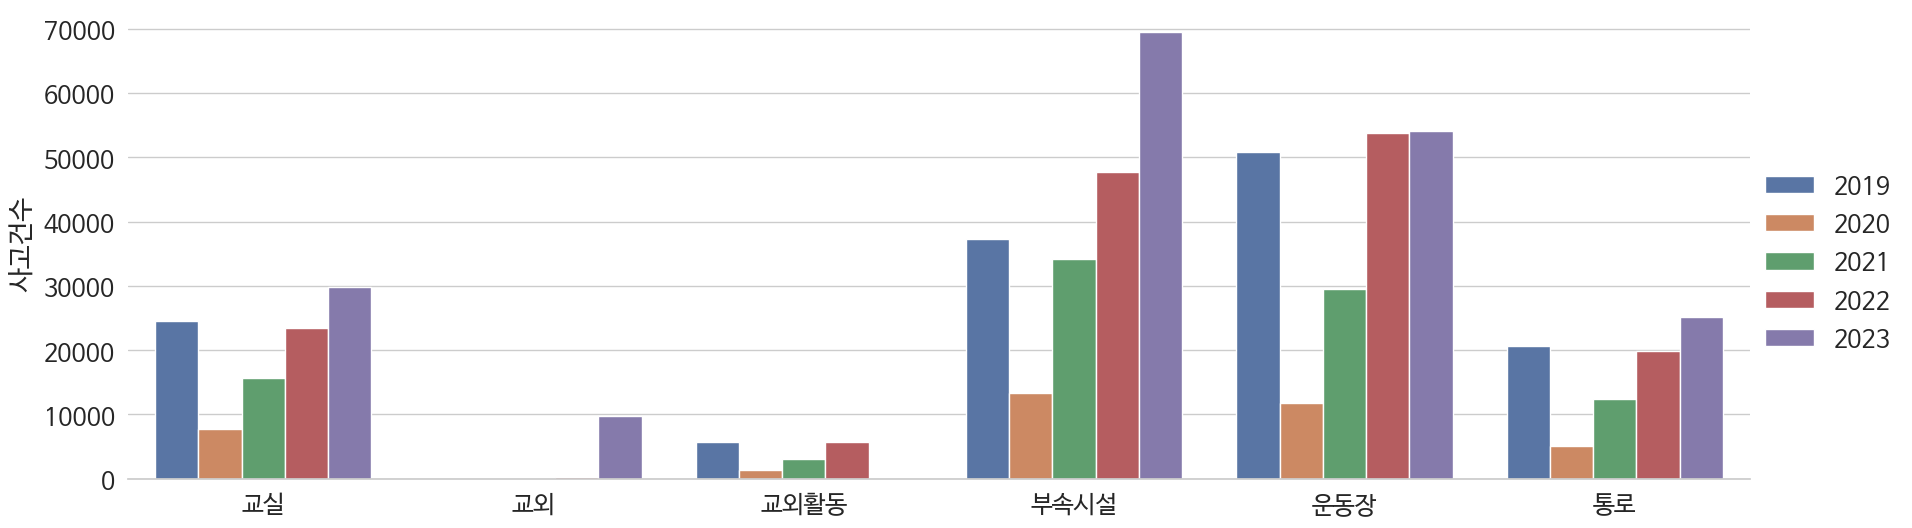

In [96]:
g = sns.catplot(
    data=acc_spot, kind="bar",
    x="사고장소", y="사고건수", hue="연도",
    errorbar="sd", height=6, aspect=3
)
sns.color_palette("flare")
g.despine(left=True)
g.set_axis_labels("", "사고건수")
g.legend.set_title("")
plt.show()

하루평균 건수 사고부위 사고 형태

In [117]:
def all_year_df(col):
    df_list = []
    val_name = [ f'acc_{y}' for y in range(2019,2024) ]
    for y in range(2019,2024):
        df_list.append(get_grouped_count(globals()['df_'+str(y)],col,str(y)))
    df = pd.concat(df_list)
    return df

In [26]:
acc_body_2019 = get_grouped_count(df_2019,'사고부위',2019).head(5)
acc_body_2020 = get_grouped_count(df_2020,'사고부위',2020).head(5)
acc_body_2021 = get_grouped_count(df_2021,'사고부위',2021).head(5)
acc_body_2022 = get_grouped_count(df_2022,'사고부위',2022).head(5)
acc_body_2023 = get_grouped_count(df_2023,'사고부위',2023).head(5)

acc_body = pd.concat([acc_body_2019,acc_body_2020,acc_body_2021,acc_body_2022,acc_body_2023])
acc_body

,사고부위,사고건수,퍼센트,연도
5,손,33034,23.772,2019
3,발,32330,23.265,2019
2,머리(두부),27336,19.671,2019
1,다리,17858,12.851,2019
7,팔,13184,9.487,2019
3,발,10429,26.433,2020
5,손,9416,23.865,2020
2,머리(두부),6315,16.006,2020
1,다리,3580,9.074,2020
4,복합부위,3482,8.825,2020


In [27]:
make_px_chart(acc_body)

In [120]:
acc_how = all_year_df('사고형태')
make_px_chart(acc_how)

- 시간별 사고 현황
    - 계절별 사고 발생 현황 : 계절별로 어떤 사고가 많이 발생하는지 (계절별 예방 대책 제시 가능)
        - 계절별 사고 건수
        - 계절별 사고 부위
        - 계절별 사고당시활동
    - 사고 시간별 사고 현황 (수업시간, 쉬는시간, 식사시간 등)
        - 사고 시간별 사고 건수
            - 사고 발생 시각별 건수(오전, 점심, 오후 정도의 비교가 의미 있지 않을지? <br>
            : 사고 시간별 건수 분석은 그냥 학교에서의 전체 시간이 수업시간, 쉬는 시간으로 뭉뚱그려진 게 좀 아쉬워서 오전 오후의 비교도 하면 어떨지 생각해봄, 애들이 밥먹고 하교 시간이 다가오면 좀 신나서 더 위험하다든가.. 그런 추측)
        - 사고 시간별 하루 평균 사고 발생 건수 : 해당 시간 대에 하루에 얼마나 사고가 발생하는지?
        - 사고 시간별 사고 형태, 사고 당시 활동, 사고 매개물 <br>
        : 사고 시간별로 어떤 사고가 많이 발생하는지? 등하교 시간에 자주 발생하는 사고 내용, 점심시간에 자주 발생하는 사고 내용 등 파악